In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# !pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def som_pie_grid(som, data, labels):
    """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
    labels_map = som.labels_map(data, labels)
    label_names = np.unique(labels)

    plt.figure(figsize=(70, 70))
    the_grid = GridSpec(70, 70)
    for position in labels_map.keys():
        label_fracs = [labels_map[position][lab] for lab in label_names]
        plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
        patches, texts = plt.pie(label_fracs)

    plt.show()

    # Cheating way to align legend, create a separate figure just
    # for legend.  Will have superfluous whitespace below
    plt.legend(patches, label_names, loc="upper left", ncol=5)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [5]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv(data_url)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seas    2141 non-null   int64  
 1   Player  2141 non-null   object 
 2   Pos     2141 non-null   object 
 3   Age     2141 non-null   int64  
 4   Tm      2141 non-null   object 
 5   G       2141 non-null   int64  
 6   GS      2141 non-null   int64  
 7   MP      2141 non-null   float64
 8   FG      2141 non-null   float64
 9   FGA     2141 non-null   float64
 10  FG%     2131 non-null   float64
 11  3P      2141 non-null   float64
 12  3PA     2141 non-null   float64
 13  3P%     1967 non-null   float64
 14  2P      2141 non-null   float64
 15  2PA     2141 non-null   float64
 16  2P%     2110 non-null   float64
 17  eFG%    2131 non-null   float64
 18  FT      2141 non-null   float64
 19  FTA     2141 non-null   float64
 20  FT%     2037 non-null   float64
 21  ORB     2141 non-null   float64
 22  

<IPython.core.display.Javascript object>

In [15]:
df = df[df["Pos"].isin(["C", "PG", "SG"])]

<IPython.core.display.Javascript object>

In [21]:
df.isna().sum()

Seas        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%         5
3P          0
3PA         0
3P%       128
2P          0
2PA         0
2P%        15
eFG%        5
FT          0
FTA         0
FT%        50
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

<IPython.core.display.Javascript object>

In [22]:
df = df.dropna()

<IPython.core.display.Javascript object>

In [23]:
X = df.select_dtypes(include="number")
y = df["Pos"]

<IPython.core.display.Javascript object>

In [24]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [28]:
n_cols = X.shape[1]
grid_rows = 10
grid_cols = 10

som = MiniSom(x=grid_rows, y=grid_cols, input_len=n_cols, random_seed=34)

som.pca_weights_init(X_std)

som.train_random(X_std, num_iteration=100)

<IPython.core.display.Javascript object>

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

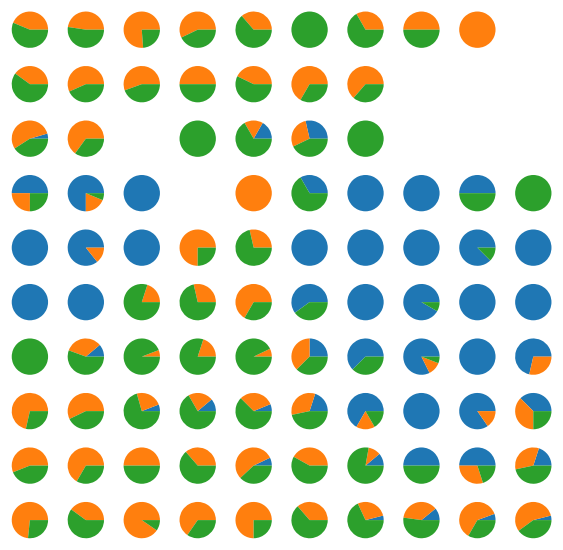

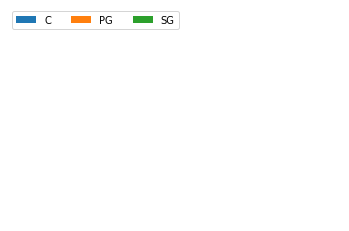

<IPython.core.display.Javascript object>

In [29]:
som_pie_grid(som, X_std, y)

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

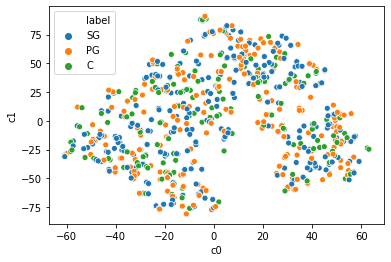

<IPython.core.display.Javascript object>

In [30]:
tsne = TSNE(n_components=2, perplexity=10, n_jobs=-1)

tsne_df = pd.DataFrame(tsne.fit_transform(X_std), columns=["c0", "c1"])
tsne_df["label"] = y

sns.scatterplot("c0", "c1", hue="label", data=tsne_df)

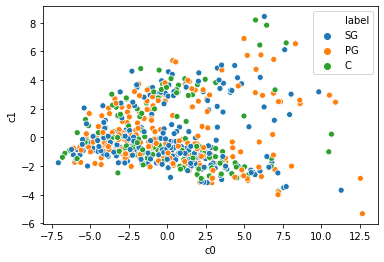

<IPython.core.display.Javascript object>

In [31]:
pca = PCA(2)
pca_df = pd.DataFrame(pca.fit_transform(X_std), columns=["c0", "c1"])
pca_df["label"] = y

sns.scatterplot("c0", "c1", hue="label", data=pca_df)


In [41]:
#som.labels_map(X_std, y)
som.win_map(X_std).values()


dict_values([[array([ 1.32732759, -0.30185086, -0.92898999, -0.8099184 , -0.21516298,
       -0.74829776, -0.55237172, -1.00321754,  0.51164874,  0.76541009,
        0.16907621, -1.13185387, -1.19424401,  0.18358597, -0.10721704,
       -0.80444294, -0.92024598,  1.2492144 , -0.70062704, -0.67958485,
       -0.75707484, -0.92029111, -0.4469446 , -0.41951848, -0.91267424,
       -0.07384695, -0.6525346 ]), array([ 1.32732759,  0.17434311, -0.97021493, -0.32305124,  0.01699979,
       -0.60898786, -0.46466109, -0.60383087,  0.26786565,  0.33607604,
        0.38949573, -0.85341444, -0.81776153, -0.46456722, -0.0203465 ,
       -0.66249689, -0.68917078,  0.27829469, -0.70062704, -0.51509329,
       -0.59800987,  0.21456175, -0.4469446 , -0.6566019 , -0.08578073,
       -0.07384695, -0.5363629 ]), array([ 1.32732759,  0.4124401 ,  0.84368224, -0.8099184 , -0.22677112,
       -0.2374948 , -0.28923985,  0.19494248,  0.75543184,  0.43148361,
        1.07208524, -0.68635078, -0.64400038, -0.222

<IPython.core.display.Javascript object>

In [43]:
df_copy = pd.DataFrame(X_std.copy())

df_copy["winner_x"] = np.nan
df_copy["winner_y"] = np.nan
df_copy["winner_id"] = np.nan

for i, row in pd.DataFrame(X_std).iterrows():
    row_np = row.values

    winner_loc = som.winner(row_np)
    winner_x, winner_y = winner_loc

    df_copy.loc[i, "winner_x"] = winner_x
    df_copy.loc[i, "winner_y"] = winner_y
    df_copy.loc[i, "winner_id"] = f"({winner_x}, {winner_y})"

df_copy

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,winner_x,winner_y,winner_id
0,1.327328,-0.301851,-0.928990,-0.809918,-0.215163,-0.748298,-0.552372,-1.003218,0.511649,0.765410,...,-0.757075,-0.920291,-0.446945,-0.419518,-0.912674,-0.073847,-0.652535,3.0,7.0,"(3, 7)"
1,1.327328,-1.016142,-0.805315,-0.844695,-0.958084,-1.073354,-0.968997,-1.148449,-0.219701,-0.140962,...,-0.637776,-0.249696,-0.681494,-0.656602,-0.558291,-0.620125,-1.001050,5.0,9.0,"(5, 9)"
2,1.327328,-0.301851,1.091032,1.902627,1.456409,1.202041,0.544011,1.877208,-1.072941,-1.190445,...,2.424225,-0.404449,1.898549,1.477149,0.504857,1.155279,0.774718,0.0,4.0,"(0, 4)"
3,1.327328,-1.254239,1.173482,0.094263,0.283987,-0.005312,-0.376950,1.647258,-1.072941,-1.095037,...,1.549367,-0.094944,0.491253,1.002982,0.268602,1.018709,-0.055080,7.0,4.0,"(7, 4)"
4,1.327328,-0.301851,-1.918388,-0.879471,-2.060857,-1.398411,-1.363695,-1.693067,-1.072941,-0.904222,...,-1.114971,-0.765538,-0.916043,-0.893685,-1.148930,-1.576112,-1.366161,7.0,9.0,"(7, 9)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,-1.422647,-1.016142,-1.877164,-0.775142,-0.331244,-0.283931,0.105458,-1.233167,-0.585375,-0.188666,...,-0.319646,0.059809,-0.681494,-0.893685,2.749283,-0.483555,-0.138060,9.0,9.0,"(9, 9)"
1150,-1.422647,-1.492336,-1.011440,-0.879471,-1.619748,-1.398411,-1.407550,-1.620451,-0.829158,-0.761111,...,-0.995672,-1.075044,-1.150593,-0.893685,-1.267057,-1.576112,-1.366161,6.0,9.0,"(6, 9)"
1151,-1.422647,-0.778045,-0.516741,-0.879471,-1.329544,-0.887608,-0.771648,-0.882191,-0.829158,-0.665703,...,-0.876374,-0.404449,-0.681494,-0.893685,-0.558291,-1.439542,-0.901474,8.0,9.0,"(8, 9)"
1152,-1.422647,0.888634,0.019184,-0.809918,-0.203555,-0.516115,-0.157674,-1.221065,0.633540,0.908521,...,-0.637776,-0.920291,-0.681494,-0.656602,-0.794547,-1.166403,-0.320615,2.0,8.0,"(2, 8)"


<IPython.core.display.Javascript object>

In [46]:
df_copy

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,winner_x,winner_y,winner_id
0,1.327328,-0.301851,-0.928990,-0.809918,-0.215163,-0.748298,-0.552372,-1.003218,0.511649,0.765410,...,-0.757075,-0.920291,-0.446945,-0.419518,-0.912674,-0.073847,-0.652535,3.0,7.0,"(3, 7)"
1,1.327328,-1.016142,-0.805315,-0.844695,-0.958084,-1.073354,-0.968997,-1.148449,-0.219701,-0.140962,...,-0.637776,-0.249696,-0.681494,-0.656602,-0.558291,-0.620125,-1.001050,5.0,9.0,"(5, 9)"
2,1.327328,-0.301851,1.091032,1.902627,1.456409,1.202041,0.544011,1.877208,-1.072941,-1.190445,...,2.424225,-0.404449,1.898549,1.477149,0.504857,1.155279,0.774718,0.0,4.0,"(0, 4)"
3,1.327328,-1.254239,1.173482,0.094263,0.283987,-0.005312,-0.376950,1.647258,-1.072941,-1.095037,...,1.549367,-0.094944,0.491253,1.002982,0.268602,1.018709,-0.055080,7.0,4.0,"(7, 4)"
4,1.327328,-0.301851,-1.918388,-0.879471,-2.060857,-1.398411,-1.363695,-1.693067,-1.072941,-0.904222,...,-1.114971,-0.765538,-0.916043,-0.893685,-1.148930,-1.576112,-1.366161,7.0,9.0,"(7, 9)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,-1.422647,-1.016142,-1.877164,-0.775142,-0.331244,-0.283931,0.105458,-1.233167,-0.585375,-0.188666,...,-0.319646,0.059809,-0.681494,-0.893685,2.749283,-0.483555,-0.138060,9.0,9.0,"(9, 9)"
1150,-1.422647,-1.492336,-1.011440,-0.879471,-1.619748,-1.398411,-1.407550,-1.620451,-0.829158,-0.761111,...,-0.995672,-1.075044,-1.150593,-0.893685,-1.267057,-1.576112,-1.366161,6.0,9.0,"(6, 9)"
1151,-1.422647,-0.778045,-0.516741,-0.879471,-1.329544,-0.887608,-0.771648,-0.882191,-0.829158,-0.665703,...,-0.876374,-0.404449,-0.681494,-0.893685,-0.558291,-1.439542,-0.901474,8.0,9.0,"(8, 9)"
1152,-1.422647,0.888634,0.019184,-0.809918,-0.203555,-0.516115,-0.157674,-1.221065,0.633540,0.908521,...,-0.637776,-0.920291,-0.681494,-0.656602,-0.794547,-1.166403,-0.320615,2.0,8.0,"(2, 8)"


<IPython.core.display.Javascript object>